# Stabilitätsbereiche

## Explizite Runge-Kutta Verfahren

In [1]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

In [2]:
def R(z,p):
    return sum(z**k/factorial(k) for k in range(p+1))

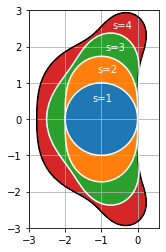

In [3]:
x = np.linspace(-3,.6,100)
y = np.linspace(-3,3,100)
x,y = np.meshgrid(x,y)

c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
pts = [[-.7,2.5],[-0.9,1.9],[-1.1,1.3],[-1.25,0.5]]

plt.figure(figsize=(5,4))
for k,p in zip(range(4),pts):
    if k > 0:
        lc = 'white'
    else:
        lc = 'black'
    plt.contour(x,y,np.abs(R(x+1j*y, 4-k)),[1], colors=lc)
    plt.contourf(x,y,np.abs(R(x+1j*y, 4-k)),[0,1], colors=c[-(k+1)])
    plt.text(*p,'s='+str(4-k),c='white')
plt.gca().set_aspect(1)
plt.grid()
#plt.savefig('explicitRKConvergenceDomain.pdf')
plt.show()

##  Implizite Runge-Kutta Verfahren

$$R(z) = 1 + z\, b^T\cdot (\mathbb{1} - z\,A)^{-1}\cdot \mathbb{1},$$

In [4]:
# implizites Euler Verfahren
def RiE(z):
    return 1/(1-z)
# implizite Mittelpunkt-Regel
def RiM(z):
    return 1+z/(1-z*0.5)
# implizite Trapez Methode
def RiT(z):
    return (2+z)/(2-z)
# Verfahren nach Hammer-Hollingsworth
def RHH(z):
    return (z**2+6*z+12)/(z**2-6*z+12)

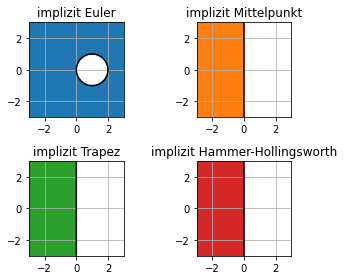

In [5]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
x,y = np.meshgrid(x,y)

c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
pts = [[-.7,2.5],[-0.9,1.9],[-1.1,1.3],[-1.25,0.5]]

plt.figure(figsize=(5,4))
plt.subplot(2,2,1)
plt.contour(x,y,np.abs(RiE(x+1j*y)),[1], colors='black')
plt.contourf(x,y,np.abs(RiE(x+1j*y)),[0,1], colors=c[0])
plt.gca().set_aspect(1)
plt.grid()
plt.title('implizit Euler')
plt.subplot(2,2,2)
plt.contour(x,y,np.abs(RiM(x+1j*y)),[1], colors='black')
plt.contourf(x,y,np.abs(RiM(x+1j*y)),[0,1], colors=c[1])
plt.title('implizit Mittelpunkt')
plt.gca().set_aspect(1)
plt.grid()
plt.subplot(2,2,3)
plt.contour(x,y,np.abs(RiT(x+1j*y)),[1], colors='black')
plt.contourf(x,y,np.abs(RiT(x+1j*y)),[0,1], colors=c[2])
plt.title('implizit Trapez')
plt.gca().set_aspect(1)
plt.grid()
plt.subplot(2,2,4)
plt.contour(x,y,np.abs(RHH(x+1j*y)),[1], colors='black')
plt.contourf(x,y,np.abs(RHH(x+1j*y)),[0,1], colors=c[3])
plt.title('implizit Hammer-Hollingsworth')
plt.gca().set_aspect(1)
plt.grid()
plt.tight_layout()
#plt.savefig('implicitRKConvergenceDomain.pdf')
plt.show()